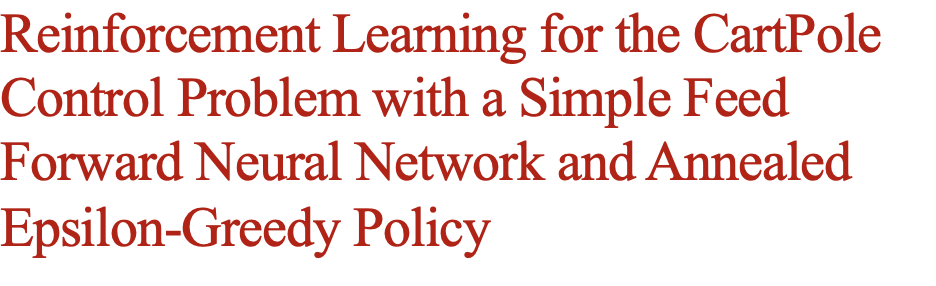

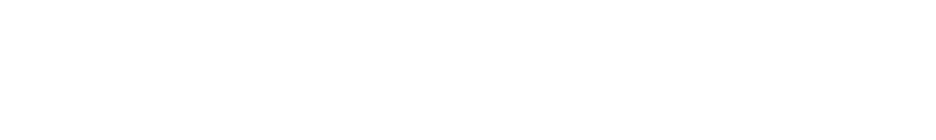

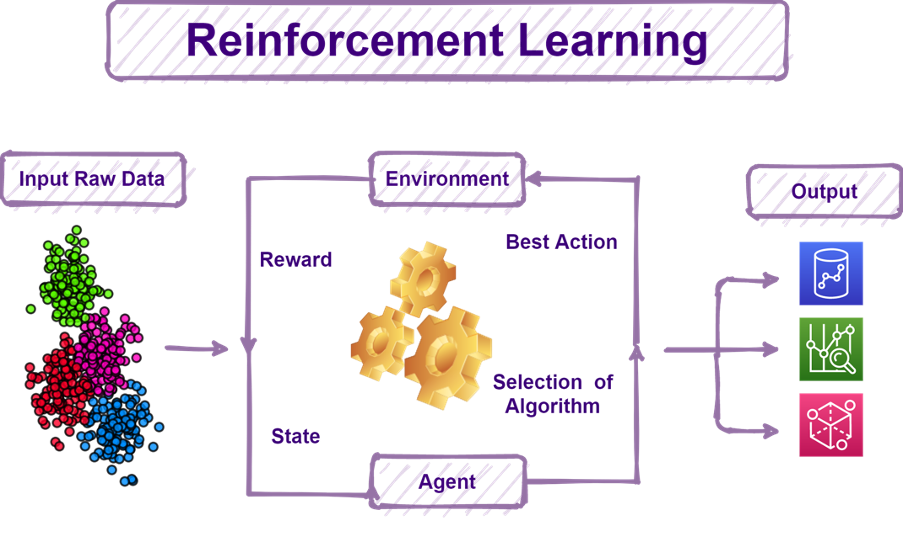

In [1]:
# install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
!pip install keras-rl2
!pip install gym
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 1.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Library Imports**

In [44]:
# import gym module for creating reinforcement learning environments
import gym

# import matplotlib module for visualizing training results
import matplotlib.pyplot as plt

# import Keras modules for building neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

# import DQNAgent from RLlib for implementing DQN
from rl.agents.dqn import DQNAgent

# import SequentialMemory from RLlib for storing experiences
from rl.memory import SequentialMemory

# import LinearAnnealedPolicy and EpsGreedyQPolicy from RLlib for exploration strategies
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

# specify the name of the environment
ENVIRON_NAME = 'CartPole-v0'

# create the environment using gym module
env = gym.make(ENVIRON_NAME)


/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning:

WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning:

WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.

/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning:

WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.



# **Model Development**

In [45]:
# create a sequential model
model = Sequential() 

# add a flatten layer with input shape
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))

# add a dense layer with 256 units and relu activation function
model.add(Dense(64, activation='relu'))

# add another dense layer with 256 units and relu activation function
model.add(Dense(16, activation='relu'))

# add a dense layer with number of units equal to action space, with linear activation function
model.add(Dense(env.action_space.n, activation='relu')) 

# print model summary
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 4)                 0         
                                                                 
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dense_13 (Dense)            (None, 16)                1040      
                                                                 
 dense_14 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1,394
Trainable params: 1,394
Non-trainable params: 0
_________________________________________________________________


# **Memory Definition**

In [55]:
memory = SequentialMemory(limit=1000, window_length=1)

# **Policy Definitions**

In [56]:
# define the inner policy
inner_policy = EpsGreedyQPolicy()

In [69]:
policy = LinearAnnealedPolicy(inner_policy=inner_policy, # Specify the inner policy to be used
attr='eps', # Specify the policy parameter to be annealed (epsilon-greedy parameter)
value_max=1.0, # The maximum epsilon value
value_min=0.05, # The minimum epsilon value
value_test=.05, # The epsilon value to be used during testing (i.e., no training)
nb_steps=10000) # The number of steps over which the annealing should occur

# **Agent Definition**

In [70]:
dqn = DQNAgent(model=model, # The neural network model to be used
nb_actions=env.action_space.n, # The number of actions available to the agent
memory=memory, # The memory object to be used for storing the agent's experience
nb_steps_warmup=45, # The number of steps to take before the agent begins to learn
target_model_update=1e-2, # The update rate for the target network
policy=policy) # The policy to be used for action selection

# **Compile and Fit the Model**

In [59]:
dqn.compile(Adam(lr=1e-3), metrics=['mae']) #Using Adam optimizer with default learning rate

history = dqn.fit(env, nb_steps=9500, visualize=False, verbose=2)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Training for 9500 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



   13/9500: episode: 1, duration: 0.808s, episode steps:  13, steps per second:  16, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.462 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   27/9500: episode: 2, duration: 0.015s, episode steps:  14, steps per second: 906, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.357 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



   49/9500: episode: 3, duration: 2.346s, episode steps:  22, steps per second:   9, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.455 [0.000, 1.000],  loss: 80.082901, mae: 50.169281, mean_q: 102.092616, mean_eps: 0.995535
   64/9500: episode: 4, duration: 0.096s, episode steps:  15, steps per second: 156, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 43.970141, mae: 50.252037, mean_q: 102.139522, mean_eps: 0.994680
  110/9500: episode: 5, duration: 0.357s, episode steps:  46, steps per second: 129, episode reward: 46.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.391 [0.000, 1.000],  loss: 30.837292, mae: 52.303937, mean_q: 106.275359, mean_eps: 0.991783
  145/9500: episode: 6, duration: 0.301s, episode steps:  35, steps per second: 116, episode reward: 35.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.371 [0.000, 1.000],  loss: 25.883445, mae: 54.412848, mean_q: 109.960035,

# **Visualization**

In [68]:
import plotly.graph_objs as go

# Create custom template
template = go.layout.Template()
template.layout.paper_bgcolor = '#301934'  # Dark purple background
template.layout.plot_bgcolor = '#301934'   # Dark purple background
template.data.scatter = [go.Scatter(marker_color='white')]  # White scatter markers

# Summarize the history for number of episode steps
trace = go.Scatter(x=list(range(len(history.history['nb_episode_steps']))),
y=history.history['nb_episode_steps'],
marker=dict(color='white'))

layout = go.Layout(title='Episode Steps Summary',
xaxis=dict(title='Episodes'),
yaxis=dict(title='nb_episode_steps'),
template=template)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


# **Testing**

In [61]:
dqn.test(env, nb_episodes=20, visualize=False)

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


# **Plot the location of the Cartpole**

/usr/local/lib/python3.9/dist-packages/gym/core.py:43: DeprecationWarning:

WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/



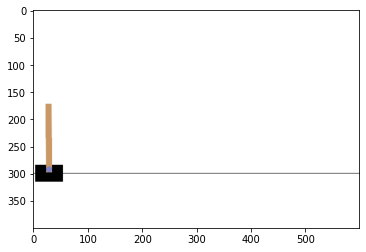

In [62]:
plt.imshow(env.render(mode='rgb_array'))